# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [3]:
df = pd.read_csv('consolidated-metrics.csv')
df = df[~df['status'].isnull()]
df.shape

(4293, 97)

---
# 3. independent variables

In [4]:
df1 = df.drop(['timestamp','status'], axis=1).describe().transpose()
df1.to_csv('describe.csv', index=False)

---
# 4. dependent variable
* there are 2757 NORMAL
* there are 646 NETWORK_DELAY_KANBAN_API_GATEWAY
* there are 500 NETWORK_DELAY_KANBAN_COMMAND_SERVICE
* there are 310 POD_KILL_KANBAN_API_GATEWAY
* there are 80 CPU_BURN_KANBAN_API_GATEWAY

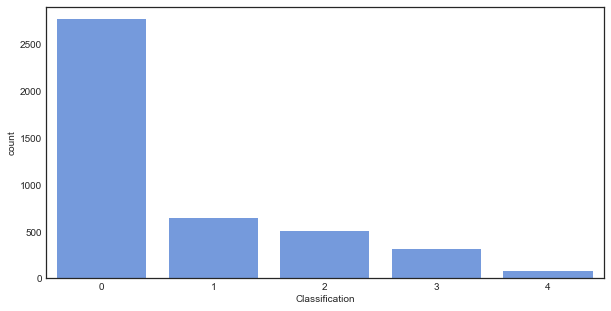

In [5]:
df['Classification'] = np.where(df['status']=='NORMAL',0,
                                np.where(df['status']=='NETWORK_DELAY_KANBAN_API_GATEWAY',1,
                                         np.where(df['status']=='NETWORK_DELAY_KANBAN_COMMAND_SERVICE',2,
                                                  np.where(df['status']=='POD_KILL_KANBAN_API_GATEWAY',3,
                                                           np.where(df['status']=='CPU_BURN_KANBAN_API_GATEWAY',4,5)))))
sns.countplot(df['Classification'], color='cornflowerblue');

---
# 5. export dataset

In [6]:
df = df.drop(['timestamp','status'], axis=1)
df.to_csv('clean.csv', index=False)